In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import scipy

In [18]:
df = pd.read_csv('GAFA Stock Prices.csv')
df['Date'] = [pd.to_datetime(x) for x in df['Date']]
df = df.set_index('Date')
df.head()

,Stock,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2004-08-19,Google,49.676899,51.693783,47.669952,49.845802,49.845802,44994500.0
2004-08-20,Google,50.178635,54.187561,49.925285,53.805050,53.805050,23005800.0
2004-08-23,Google,55.017166,56.373344,54.172661,54.346527,54.346527,18393200.0
2004-08-24,Google,55.260582,55.439419,51.450363,52.096165,52.096165,15361800.0
2004-08-25,Google,52.140873,53.651051,51.604362,52.657513,52.657513,9257400.0


In [19]:
dfstock = pd.DataFrame()
for x in set(df.Stock):
    dfstock[x.lower() + "_close"] = df[df.Stock==x]["Close"]
    dfstock[x.lower() + "_volume"] = df[df.Stock==x]["Volume"]
dfstock = dfstock.sort_index()
dfstock.head()

,google_close,google_volume,apple_close,apple_volume,facebook_close,facebook_volume,amazon_close,amazon_volume
Date,,,,,,,,
2004-01-09,49.801090,9206800.0,2.561429,128931600.0,NaN,NaN,38.240002,5252500.0
2004-01-10,65.861633,15238400.0,2.762143,116351200.0,NaN,NaN,40.470001,11268900.0
2004-01-11,97.381630,24608700.0,3.746428,150512600.0,NaN,NaN,35.099998,6181300.0
2004-01-12,89.398552,15830400.0,4.842143,200138400.0,NaN,NaN,39.980000,7756000.0
2004-02-09,50.427021,15232100.0,2.547143,101581200.0,NaN,NaN,39.180000,5722300.0


In [17]:
dfstocknorm = dfstock["facebook_close"] / dfstock["facebook_close"]["2012-01-06"]
dfstocknorm.head()

Date
2004-01-09   NaN
2004-01-10   NaN
2004-01-11   NaN
2004-01-12   NaN
2004-02-09   NaN
Name: facebook_close, dtype: float64

In [6]:
Facebook_Close = dfstock["facebook_close"]
Apple_Close = dfstock["apple_close"]
Google_Close = dfstock["google_close"]
Amazon_Close = dfstock["amazon_close"]
Facebook_Volume = dfstock["facebook_volume"]/1000000
Apple_Volume = dfstock["apple_volume"]/1000000
Google_Volume = dfstock["google_volume"]/10000
Amazon_Volume = dfstock["amazon_volume"]/10000

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


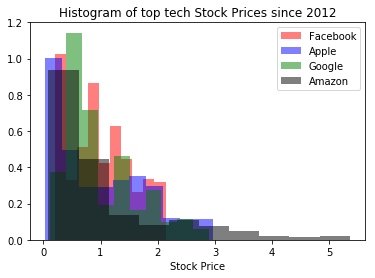

In [7]:
plt.hist(Facebook_Close, density=True, color='red', alpha=.5, label="Facebook")
plt.hist(Apple_Close, density=True, color='blue', alpha=.5, label="Apple")
plt.hist(Google_Close, density=True, color='green', alpha=.5, label="Google")
plt.hist(Amazon_Close, density=True, color='black', alpha=.5, label="Amazon")
plt.title('Histogram of top tech Stock Prices since 2012')
plt.xlabel('Stock Price')
plt.legend(loc='upper right') 

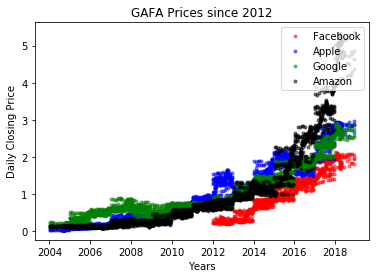

In [8]:
plt.plot(Facebook_Close, '.', color='red', alpha=0.5, label='Facebook')
plt.plot(Apple_Close,'.', color='blue', alpha=0.5, label='Apple')
plt.plot(Google_Close,'.', color='green', alpha=0.5, label='Google')
plt.plot(Amazon_Close,'.', color='black', alpha=0.5, label='Amazon')
plt.ylabel('Daily Closing Price')
plt.xlabel('Years')
plt.title('GAFA Prices since 2012')
plt.legend(loc='upper right') 
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


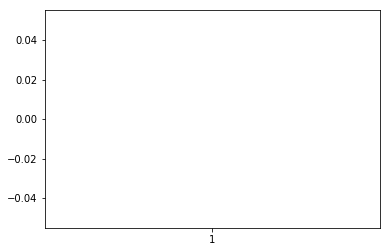

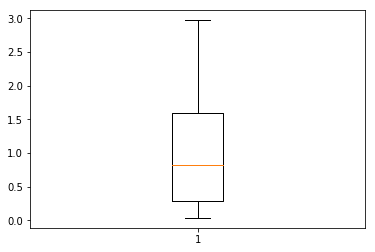

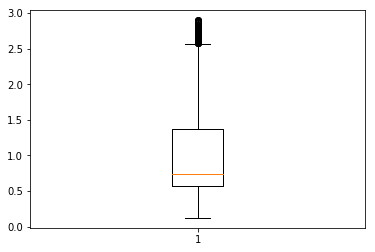

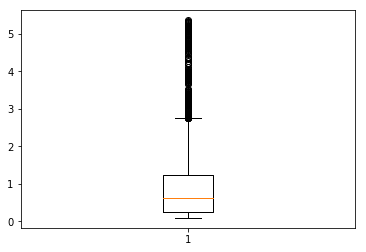

In [9]:
plt.boxplot(Facebook_Close)
plt.show()
plt.boxplot(Apple_Close)
plt.show()
plt.boxplot(Google_Close)
plt.show()
plt.boxplot(Amazon_Close)
plt.show()

Text(0.5, 1.0, "Facebook's Volume (in Millions) and Price Since 2012")

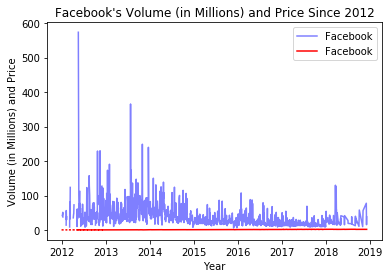

In [10]:
plt.plot(Facebook_Volume, alpha=0.5, color='blue', label='Facebook')
plt.plot(Facebook_Close, color='red', label='Facebook')
plt.legend(loc='upper right')
plt.ylabel("Volume (in Millions) and Price")
plt.xlabel("Year")
plt.title('Facebook\'s Volume (in Millions) and Price Since 2012')

Text(0.5, 1.0, "Google's Volume (in 10,000s) and Price Since 2012")

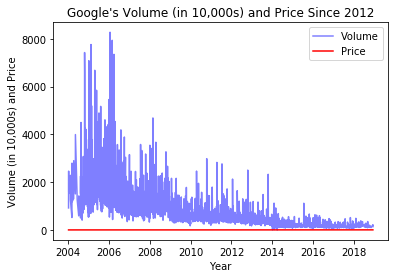

In [11]:
plt.plot(Google_Volume, alpha=0.5, color='blue', label='Volume')
plt.plot(Google_Close, color='red', label='Price')
plt.legend(loc='upper right')
plt.ylabel("Volume (in 10,000s) and Price")
plt.xlabel("Year")
plt.title('Google\'s Volume (in 10,000s) and Price Since 2012')

Text(0.5, 1.0, "Apple's Volume (in Millions) and Price Since 2012")

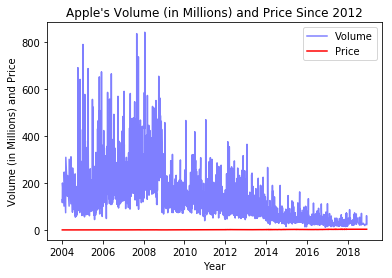

In [12]:
plt.plot(Apple_Volume, alpha=0.5, color='blue', label='Volume')
plt.plot(Apple_Close, color='red', label='Price')
plt.legend(loc='upper right')
plt.ylabel("Volume (in Millions) and Price")
plt.xlabel("Year")
plt.title('Apple\'s Volume (in Millions) and Price Since 2012')

Text(0.5, 1.0, "Apple's Volume (in 10,000s) and Price Since 2012")

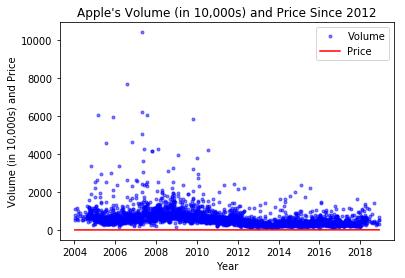

In [13]:
plt.plot(Amazon_Volume, '.', alpha=0.5, color='blue', label='Volume')
plt.plot(Amazon_Close, color='red', label='Price')
plt.legend(loc='upper right')
plt.ylabel("Volume (in 10,000s) and Price")
plt.xlabel("Year")
plt.title('Apple\'s Volume (in 10,000s) and Price Since 2012')